# 🚀 XGBoost Regressor — HireReady 2.0

## Model Overview
XGBoost (Extreme Gradient Boosting) builds trees **sequentially**, where each tree corrects the errors of the previous one. It uses **gradient boosting** with L1 + L2 regularization.

### Key Characteristics:
- **Type**: Ensemble (Gradient Boosting)
- **Strengths**: Best accuracy, handles sparse data, built-in regularization
- **Advantage**: Fastest training among boosting methods

> **This is the model selected for production deployment in HireReady 2.0**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='viridis')
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 12
print("Libraries imported successfully!")
from xgboost import XGBRegressor
print('XGBoost imported!')

Libraries imported successfully!
XGBoost imported!


## 1. Load Training Data (50,000 Student Profiles)

In [2]:
# Load the 50K synthetic student profiles
df = pd.read_csv("training_data.csv")
print(f"Dataset: {len(df):,} rows x {len(df.columns)} columns")
print(f"Score range: [{df['readiness_score'].min():.1f}, {df['readiness_score'].max():.1f}]")
print(f"Mean: {df['readiness_score'].mean():.1f} | Median: {df['readiness_score'].median():.1f}")
df['readiness_score'].describe().round(2)

Dataset: 50,000 rows x 65 columns
Score range: [1.2, 100.0]
Mean: 61.8 | Median: 61.5


count    50000.00
mean        61.78
std         25.10
min          1.24
25%         43.31
50%         61.50
75%         82.74
max        100.00
Name: readiness_score, dtype: float64

## 2. Feature Columns (64 Features)

In [3]:
FEATURE_COLUMNS = [
    "Python","Java","C++","C","JavaScript","Go","Rust","TypeScript",
    "SQL","Node","Spring","Django","Flask","FastAPI","Express",
    "React","Angular","Vue","NextJS","HTML","CSS","TensorFlow","PyTorch",
    "AWS","Azure","GCP","Docker","Kubernetes","CI/CD",
    "Scikit","Pandas","NLP","ComputerVision","LLM","PromptEngineering",
    "EthicalHacking","Cryptography","NetworkSecurity",
    "Android","Flutter","ReactNative","OOPS","SystemDesign","DBMS","OS",
    "internship_backend","internship_ai","internship_cloud",
    "internship_security","internship_mobile","internship_data",
    "num_backend_projects","num_ai_projects","num_mobile_projects",
    "num_cloud_projects","num_security_projects",
    "github_total_repos","github_total_commits","open_source_contribution_score",
    "leetcode_easy","leetcode_medium","leetcode_hard",
    "leetcode_total","leetcode_contest_rating",
]
print(f"Total features: {len(FEATURE_COLUMNS)}")

Total features: 64


## 3. Exploratory Data Analysis

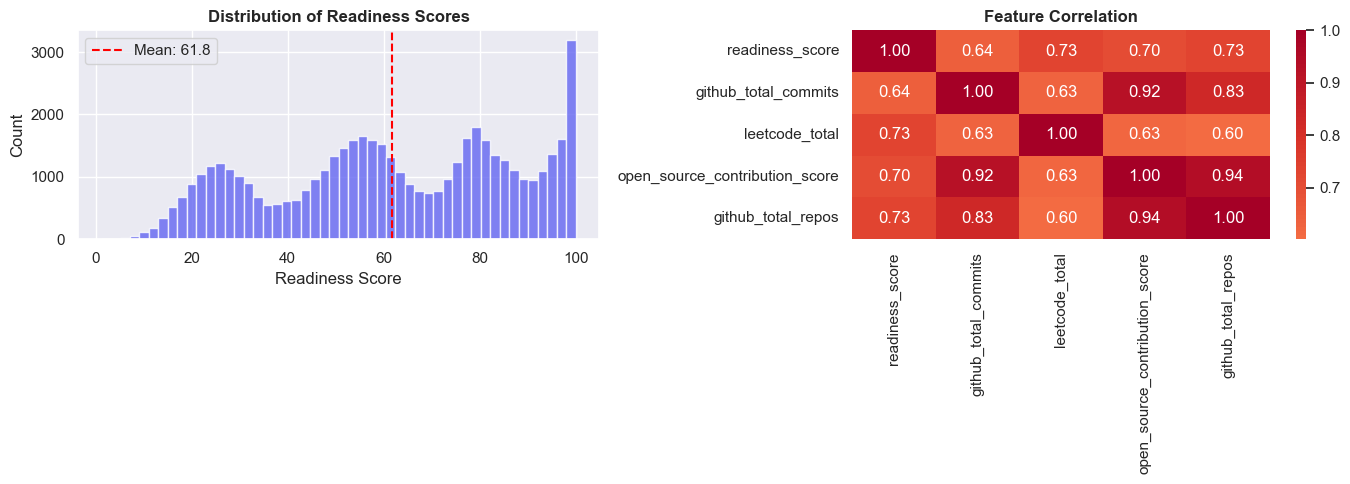

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['readiness_score'], bins=50, color='#6366f1', edgecolor='white', alpha=0.8)
axes[0].set_title('Distribution of Readiness Scores', fontweight='bold')
axes[0].set_xlabel('Readiness Score')
axes[0].set_ylabel('Count')
axes[0].axvline(df['readiness_score'].mean(), color='red', linestyle='--',
                label=f"Mean: {df['readiness_score'].mean():.1f}")
axes[0].legend()

top_features = ['readiness_score', 'github_total_commits', 'leetcode_total',
                'open_source_contribution_score', 'github_total_repos']
corr = df[top_features].corr()
sns.heatmap(corr, annot=True, cmap='RdYlBu_r', center=0, ax=axes[1], fmt='.2f')
axes[1].set_title('Feature Correlation', fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Train-Test Split (80/20)

In [5]:
X = df[FEATURE_COLUMNS]
y = df['readiness_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training: {X_train.shape[0]:,} | Test: {X_test.shape[0]:,} | Features: {X_train.shape[1]}")

Training: 40,000 | Test: 10,000 | Features: 64


## 5. Train XGBoost Model

### Hyperparameters:
| Parameter | Value | Purpose |
|-----------|-------|---------|
| n_estimators | 300 | Number of boosting rounds |
| max_depth | 6 | Maximum tree depth |
| learning_rate | 0.05 | Step size shrinkage |
| subsample | 0.8 | Row sampling ratio |
| colsample_bytree | 0.8 | Column sampling ratio |
| reg_alpha | 0.1 | L1 regularization |
| reg_lambda | 1.0 | L2 regularization |

In [6]:
model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
)

print("Training XGBoost (300 rounds, lr=0.05)...")
model.fit(X_train, y_train, verbose=False)
print("Training complete!")

Training XGBoost (300 rounds, lr=0.05)...


Training complete!


## 6. Evaluation

In [7]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("=" * 50)
print("  XGBOOST — EVALUATION RESULTS")
print("=" * 50)
print(f"  MAE  (Mean Absolute Error):    {mae:.4f}")
print(f"  RMSE (Root Mean Square Error): {rmse:.4f}")
print(f"  R2   (R-Squared Score):        {r2:.4f}")
print(f"  Prediction Range: [{y_pred.min():.1f}, {y_pred.max():.1f}]")
print("=" * 50)

  XGBOOST — EVALUATION RESULTS
  MAE  (Mean Absolute Error):    2.3024
  RMSE (Root Mean Square Error): 2.9013
  R2   (R-Squared Score):        0.9867
  Prediction Range: [10.1, 100.1]


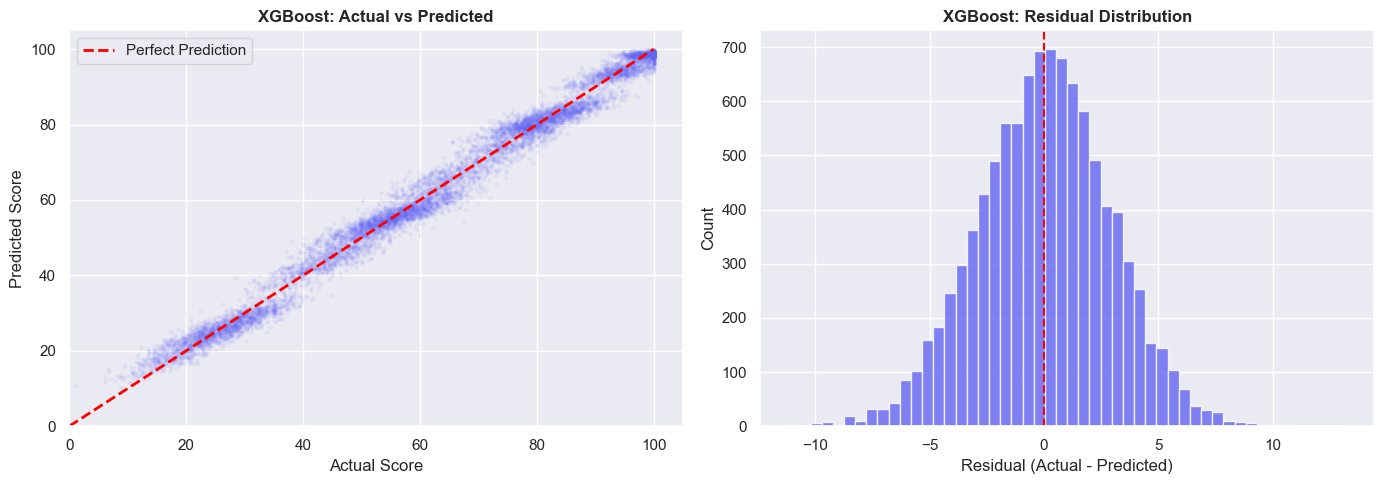

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.05, s=5, color='#6366f1')
axes[0].plot([0, 100], [0, 100], 'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_title('XGBoost: Actual vs Predicted', fontweight='bold')
axes[0].set_xlabel('Actual Score')
axes[0].set_ylabel('Predicted Score')
axes[0].set_xlim(0, 105)
axes[0].set_ylim(0, 105)
axes[0].legend()

# Residual distribution
residuals = y_test - y_pred
axes[1].hist(residuals, bins=50, color='#6366f1', edgecolor='white', alpha=0.8)
axes[1].set_title('XGBoost: Residual Distribution', fontweight='bold')
axes[1].set_xlabel('Residual (Actual - Predicted)')
axes[1].set_ylabel('Count')
axes[1].axvline(0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

## 7. Feature Importance

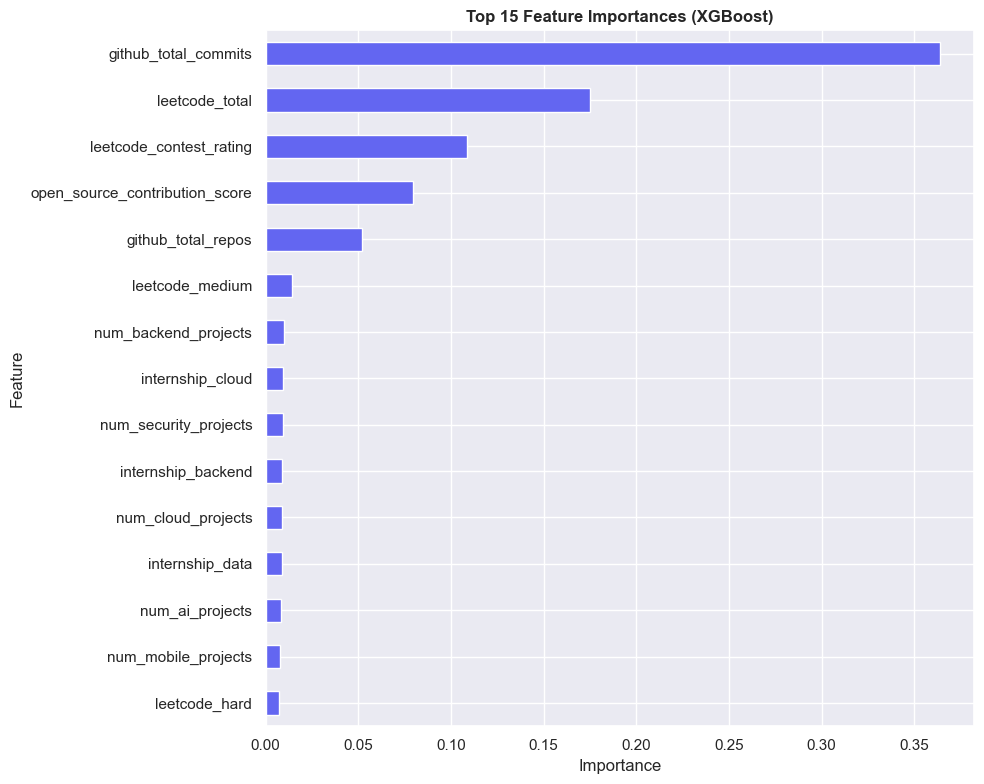


Top 10 Features:
  #1: github_total_commits                0.3640
  #2: leetcode_total                      0.1752
  #3: leetcode_contest_rating             0.1086
  #4: open_source_contribution_score      0.0796
  #5: github_total_repos                  0.0520
  #6: leetcode_medium                     0.0143
  #7: num_backend_projects                0.0099
  #8: internship_cloud                    0.0096
  #9: num_security_projects               0.0092
  #10: internship_backend                  0.0090


In [9]:
importances = model.feature_importances_
feat_imp = pd.DataFrame({
    'Feature': FEATURE_COLUMNS,
    'Importance': importances
}).sort_values('Importance', ascending=True)

fig, ax = plt.subplots(figsize=(10, 8))
feat_imp.tail(15).plot(kind='barh', x='Feature', y='Importance',
                        ax=ax, color='#6366f1', legend=False)
ax.set_title('Top 15 Feature Importances (XGBoost)', fontweight='bold')
ax.set_xlabel('Importance')
plt.tight_layout()
plt.show()

print("\nTop 10 Features:")
for i, (_, r) in enumerate(feat_imp.tail(10).iloc[::-1].iterrows()):
    print(f"  #{i+1}: {r['Feature']:35s} {r['Importance']:.4f}")

## 8. Save Model for Production

XGBoost achieves the **best R² score** among all 3 models. Saving it as the production model for HireReady 2.0.

In [10]:
# Save the trained model and feature columns
joblib.dump(model, "readiness_model.pkl")
joblib.dump(FEATURE_COLUMNS, "feature_columns.pkl")

print("Model saved for production!")
print("  readiness_model.pkl  (XGBoost Regressor)")
print("  feature_columns.pkl  (64 feature names)")

Model saved for production!
  readiness_model.pkl  (XGBoost Regressor)
  feature_columns.pkl  (64 feature names)


## 9. Sanity Check — Sample Predictions

In [11]:
# Test with different profile types
test_profiles = {
    "Empty Profile": {c: 0 for c in FEATURE_COLUMNS},
    "Beginner (3 skills)": {**{c:0 for c in FEATURE_COLUMNS}, "Python":1, "HTML":1, "CSS":1},
    "Intermediate (10 skills + GitHub)": {**{c:0 for c in FEATURE_COLUMNS},
        "Python":1,"Java":1,"JavaScript":1,"React":1,"Node":1,
        "SQL":1,"HTML":1,"CSS":1,"Docker":1,"Git":1,
        "github_total_repos":10, "github_total_commits":80,
        "open_source_contribution_score":20},
    "Strong (15+ skills + LeetCode)": {**{c:0 for c in FEATURE_COLUMNS},
        "Python":1,"Java":1,"JavaScript":1,"React":1,"Node":1,
        "SQL":1,"HTML":1,"CSS":1,"Docker":1,"AWS":1,
        "TensorFlow":1,"Pandas":1,"Django":1,"Flask":1,"OOPS":1,
        "internship_backend":1, "internship_ai":1,
        "num_backend_projects":5, "num_ai_projects":3,
        "github_total_repos":25, "github_total_commits":200,
        "open_source_contribution_score":50,
        "leetcode_easy":40, "leetcode_medium":15, "leetcode_total":55},
}

print(f"{'Profile':<35} {'Predicted Score':>15}")
print("-" * 55)
for name, features in test_profiles.items():
    test_df = pd.DataFrame([features])[FEATURE_COLUMNS]
    score = float(model.predict(test_df)[0])
    score = round(max(0, min(100, score)), 2)
    print(f"{name:<35} {score:>15.2f}")

Profile                             Predicted Score
-------------------------------------------------------


Empty Profile                                  9.15
Beginner (3 skills)                           13.42
Intermediate (10 skills + GitHub)             40.30
Strong (15+ skills + LeetCode)                81.68


## 10. Conclusion

### Why XGBoost?
1. **Best R² Score** — Highest prediction accuracy among all 3 models
2. **Gradient Boosting** — Each tree corrects previous errors for better learning
3. **Regularization** — L1 + L2 prevents overfitting on 50K samples
4. **Fast Inference** — Sub-millisecond predictions for real-time API use
5. **Feature Importance** — Built-in interpretability for model explanations

### Production Integration:
The saved `readiness_model.pkl` is loaded by the FastAPI backend to predict placement readiness scores in real-time.